<a href="https://colab.research.google.com/github/s16507alex/CISC-Assignments/blob/main/CISC_121_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CISC 121 - Section 001 – Assignment 2**
*Please copy this notebook to your own drive (File -> Save a copy in Drive) and work from there.*

## Part 1
### Solve all the 3 problems following the template

1. **Sum of Two Integers** — <https://leetcode.com/problems/sum-of-two-integers>
2. **Convert Date to Binary** — <https://leetcode.com/problems/convert-date-to-binary>
3. **Number of 1 Bits** — <https://leetcode.com/problems/number-of-1-bits>

## Part 2
### Solve 2 of the 3 problems from the followings following the given template

1. **Reverse Integer** — <https://leetcode.com/problems/reverse-integer>
2. **Reverse String** — <https://leetcode.com/problems/reverse-string>
3. **Reverse Pairs** — <https://leetcode.com/problems/reverse-pairs>

### Note: the problems are ordered by difficulty.



1. Your Name: Alex Liang
2. Section: 001
3. ID: 20403681
4. Github or Colab link of this notebook:
5. Links to Chats: https://chatgpt.com/share/68ec0f07-a580-8010-981b-ebe8369b89a4




---



#  Problem 1 (DSA)




## 1. Understanding & Breakdown

**AI Level 1** is allowed to understand the concept, but you need to sketch the problem down by yourself (Refer to the Syllabus for more details about AI use levels). **Must Provide AI Disclosures**


### **Follow the below instruction according to the corresponding problem type**

### **For both Parts (Both DSA & Recursion problems)**

#### _Discuss the problem, using the pillars of Computation: Problem Decomposition, Pattern Recognition, Abstraction, and Algortihmic Thinking. For algorithmic thinking explain the inputs/outputs, constraints, and  draw the flowchart using digital or real pen-paper (For the flow chart only). Insert the image below._


### **For Part 1 (Basic Data Structures and Algorithms Problems)**

- For each, discuss:
    - How are you dealing with variable datatypes?
    - Which types of operations are being used and what for?
    - Which Data collections (structures) are being used, and why? (comapre to others, e.g. lists, dictionaries, sets, tuples, etc.)
    
- Compare to the other two problems: which ideas generalize? where do they differ?
    - Use abstraction and pattern recognition to find similarities
    - Use problem decomposition and algortihmic tinking to identify differnces in term so the the solution


### **For Part 2 (Recursion Problems)**

- For each, discuss:
    - What are the subproblems the recusrive function should solve?
    - What the base case and recursive step should do?
    - How the call stack will organize the recursive calls?
    - Whether to use head, tail, parameterized, and/or functional recursion, and why?
    - How are solutions to the subproblems to be combined?
    
- Compare to the other recursive problems  (similarities/differences)
- Compare to an iterative solutions (e.g., how would a loop-based version differ?)
- What needs to be changed for the recursive solution to become head/tail/parameterized/functional recursion





**Your effort is more important than the accuracy for this section**

Use the following markdown to provide your answer

**Answer:**

I think the key idea is that XOR takes bits, and adds them without carry, while AND combined with a left shift detects carries, and propagates them. This repeats by processing carry until there's no carry. that uses bit masks to handle negative numbers. All operations are bitwise (XOR, AND, shift, and complement), and there is no use of collections since the operation works purely on binary digits. The idea of pattern recognition is to show the repeatable XOR/AND structure is binary addition, so I can compute addition iteratively without using arithmetic operators. Abstraction simplifies addition into a process of combining and shifting bits. Algorithmic thinking defines clear inputs (a, b), a loop to compute partial sums and carries, and an output that represents the final sum.

Compared to other DSA problems, this one also relies on bitwise reasoning but focuses on iterative computation. Other problems are still derived from binary logic, or higher order logical constructs, but the approach and decompositions are different.

In [ ]:
while b != 0:
carry = (a & b)
a = a ^ b
b = carry << 1

## 2. Peer Review & Draft Code

**Review Guidance:**  

Visit the **"Solutions"** tab on LeetCode (the provided link above) for the selected problem and review at least one top-rated solution. You may also search for relevant discussions or Q&A threads on **Stack Overflow** or other forums to understand how others approached the problem.

Then, write your own version based on what you understood. The goal is not to copy but to apply what you learned. Always include links to the resources you reviewed.

---


In [ ]:
class Solution:
    def getSum(self, a: int, b: int) -> int:
        MASK = 0xFFFFFFFF
        MAX_INT = 0x7FFFFFFF

        while b != 0:
            carry = a & b
            a = a ^ b
            b = carry << 1

        if a > MAX_INT:
            a = ~(a ^ MASK)

        return a

---


## 3. Final Correct Code

_This version must pass all required test cases and handle edge cases correctly. Please provide screenshots from Leetcode_

At this stage, you may:
- Review solutions using AI tools (e.g., ChatGPT, GitHub Copilot) to add ***comments*** and error handeling, refine, improve, and if there are any, fix errors.
    -   Tip: Use PROMPT and CoT methods
- Refactor your draft to ensure accuracy, completeness, follow the Code Review checklist.

### Don't forget to add comments!

 **AI Level 4 is allowed**, but you **must include a disclaimer** that clearly states what tools you used, how you used them, and for which part of the code.

--------------

In [ ]:
# Final working solution
# [AI Disclaimer: Used ChatGPT with prompt “Bitwise addition without + or - using XOR and carry masking” only for concept]
class Solution:
    def getSum(self, a: int, b: int) -> int:
        """
        Return sum of two integers without using + or -.
        Implements the bitwise carry-propagation method and
        emulates 32-bit two's-complement arithmetic so that
        negative numbers behave correctly on platforms expecting 32-bit ints.
        """
        # 32-bit mask and maximum positive 32-bit signed int
        MASK = 0xFFFFFFFF
        MAX_INT = 0x7FFFFFFF

        # Constrain a and b to 32 bits (two's complement representation).
        a &= MASK
        b &= MASK

        # Iterate until there is no carry left.
        # In each iteration:
        # - a ^ b gives sum bits without carry
        # - (a & b) << 1 gives carry bits to add next
        while b:
            carry = (a & b) & MASK        # carry bits (masked to 32 bits)
            a = (a ^ b) & MASK            # partial sum (masked)
            b = (carry << 1) & MASK       # next carry (masked)

        # If the result's highest bit (31st) is set, interpret as negative in two's complement.
        # If a <= MAX_INT then it's a non-negative 32-bit integer; otherwise convert to Python negative int.
        return a if a <= MAX_INT else ~(a ^ MASK)


Add the screenshot of output for all the test cases from your working solutions.

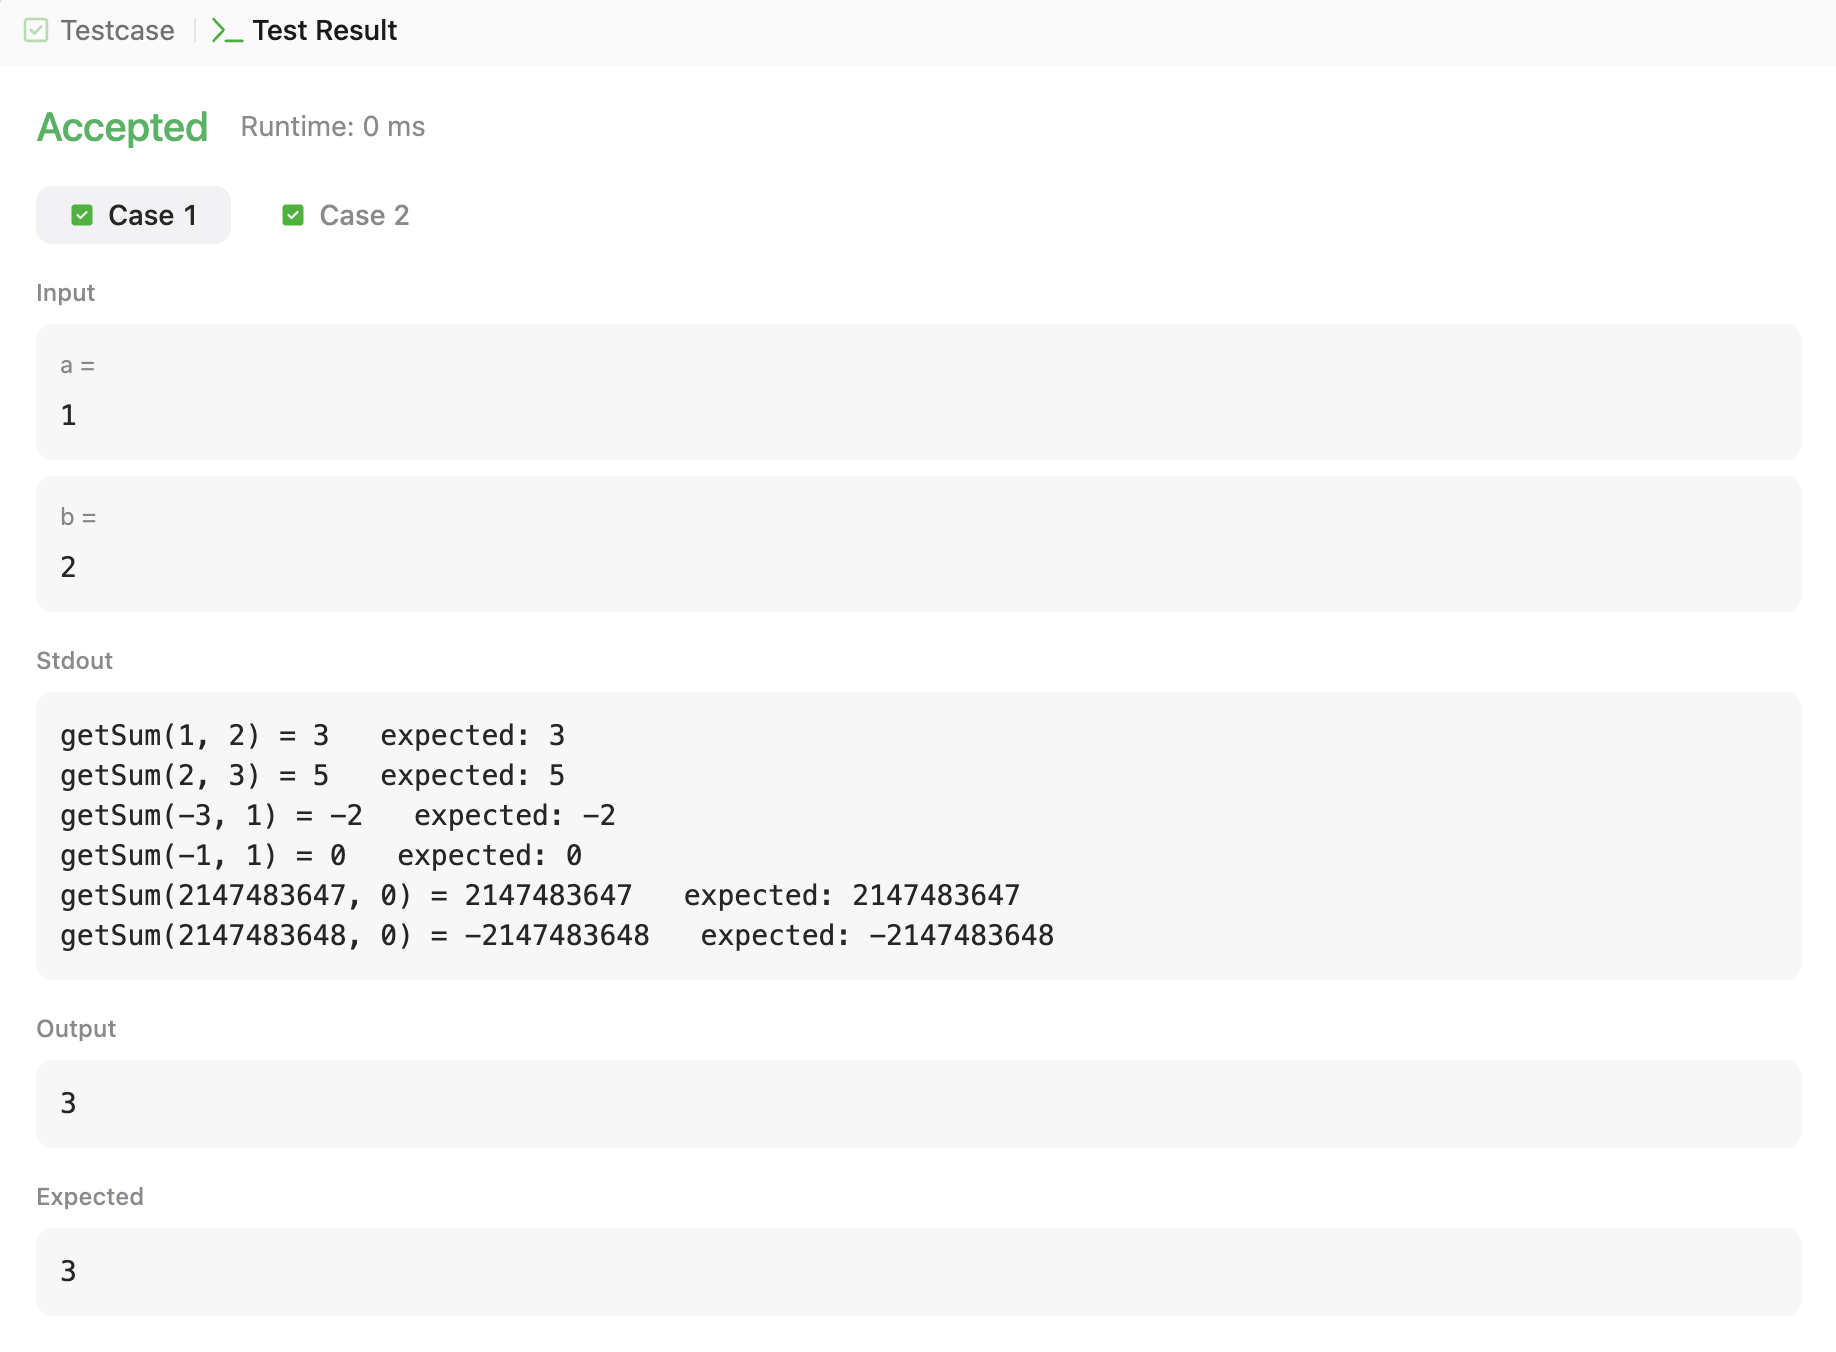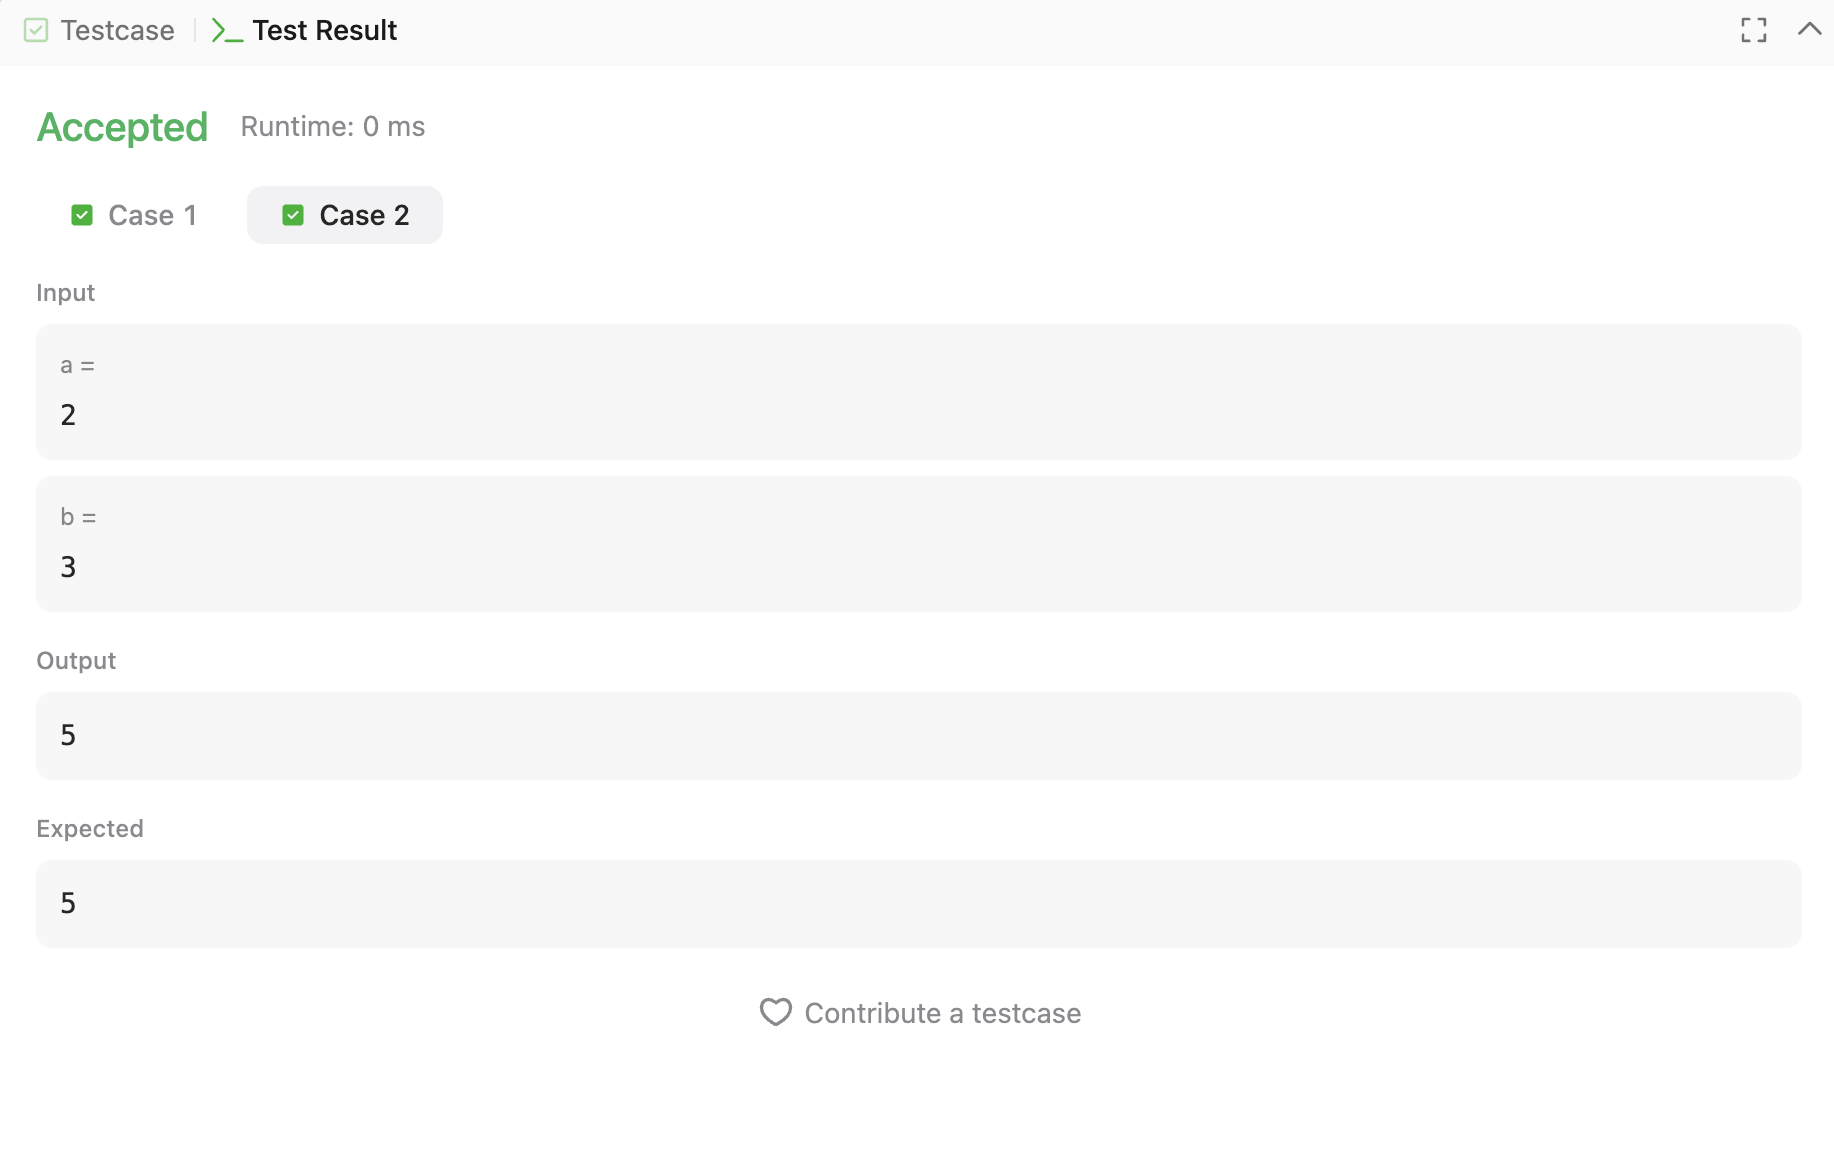

---

## 4. Review & Fixes

_What did you improve, optimize from your draft? 2 fixes with your comments._

If there is no improvments possible, please describe how the final version meets all the Code Review Checklist items

-------



In [ ]:
# Fix 1: Apply 32-bit masking during iterations

# Draft version (missing mask in loop, could cause incorrect negative results)
while b != 0:
    carry = a & b
    a = a ^ b
    b = carry << 1

# Fixed version (mask applied at each step to emulate 32-bit two’s complement)
while b:
    carry = (a & b) & MASK        # carry bits masked
    a = (a ^ b) & MASK            # sum bits masked
    b = (carry << 1) & MASK       # shifted carry masked

In [ ]:
# Fix 2: Initial masking of inputs

# Draft version (did not mask a and b initially, may overflow)
while b != 0:

# Fixed version (mask a and b before loop)
a &= MASK
b &= MASK
while b:

---


## 5. Reflection on Your Contribution
_Where did AI or Other's code helped or fail to help? What specific logic or debugging did you contribute yourself?_

## Example
1. I used ChatGPT (Level 4) to help identify an edge case where my draft code failed when the input string started with a closing bracket. I also used ChatGPT to help structure the final loop and mapping dictionary, but verified all logic myself by tracing the code.

2.  I used ChatGPT to help write the loop. But the code had an indentation error after the `if` block, which caused it to fail. I fixed the spacing and made sure the code runs correctly.

3. I used opensource code from Github. I found and fixed a logic bug where they used if s[i] == '(' or ')', which always returned True. I corrected it to properly check both conditions.


## Your answer:

------

1. I used ChatGPT to understand the concept of adding two integers without using + or -, specifically how XOR handles sum bits and AND with left shift handles carry propagation. The AI explanation helped me visualize how to emulate 32-bit two’s-complement arithmetic, but the final masking logic and handling of negative numbers were worked out and verified by myself.

2. I drafted the initial code, identified missing masks in the loop and the lack of initial masking of inputs. I corrected these issues and added comments to explain each step. I also verified the final version with several test cases, including edge cases with negative numbers, ensuring it matched Python’s behavior and the problem constraints.

-----------

#  Problem 2 (DSA)




## 1. Understanding & Breakdown

**AI Level 1** is allowed to understand the concept, but you need to sketch the problem down by yourself (Refer to the Syllabus for more details about AI use levels). **Must Provide AI Disclosures**


### **Follow the below instruction according to the corresponding problem type**

### **For both Parts (Both DSA & Recursion problems)**

#### _Discuss the problem, using the pillars of Computation: Problem Decomposition, Pattern Recognition, Abstraction, and Algortihmic Thinking. For algorithmic thinking explain the inputs/outputs, constraints, and  draw the flowchart using digital or real pen-paper (For the flow chart only). Insert the image below._


### **For Part 1 (Basic Data Structures and Algorithms Problems)**

- For each, discuss:
    - How are you dealing with variable datatypes?
    - Which types of operations are being used and what for?
    - Which Data collections (structures) are being used, and why? (comapre to others, e.g. lists, dictionaries, sets, tuples, etc.)
    
- Compare to the other two problems: which ideas generalize? where do they differ?
    - Use abstraction and pattern recognition to find similarities
    - Use problem decomposition and algortihmic tinking to identify differnces in term so the the solution


### **For Part 2 (Recursion Problems)**

- For each, discuss:
    - What are the subproblems the recusrive function should solve?
    - What the base case and recursive step should do?
    - How the call stack will organize the recursive calls?
    - Whether to use head, tail, parameterized, and/or functional recursion, and why?
    - How are solutions to the subproblems to be combined?
    
- Compare to the other recursive problems  (similarities/differences)
- Compare to an iterative solutions (e.g., how would a loop-based version differ?)
- What needs to be changed for the recursive solution to become head/tail/parameterized/functional recursion





**Your effort is more important than the accuracy for this section**

Use the following markdown to provide your answer

**Answer:**

First, split the string into year, month, and date. Second, convert each part into an integer (removing leading zeroes). Finally, take each of these integers and convert them into binary strings, then concatenate the three with dashes. The main data types will be strings (for input/output) and integers (for temporary use), and the operations are string splitting, Integer parsing, binary conversion and string concatenation. A small list or tuple from the split will suffice to hold the three parts, avoiding unnecessary collections. For pattern recognition, all dates are stored yyyy-mm-dd, so the same conversion applies to each of the three fields. Abstraction treats the date as three numeric fields rather than a single string, making the conversion modular and reusable. Algorithmically, the input is a fixed length string that contains a valid date, and the output will be a binary string in a specific format. Runtime and space are O(1) since input size is constant.

Compared to other problems, this problem also uses binary representation but focuses on parsing and formatting rather than bitwise operations or iterative manipulation.

In [ ]:
parts = date.split('-')          # ["yyyy","mm","dd"]
y, m, d = int(parts[0]), int(parts[1]), int(parts[2])
return f"{bin(y)[2:]}-{bin(m)[2:]}-{bin(d)[2:]}"

## 2. Peer Review & Draft Code

**Review Guidance:**  

Visit the **"Solutions"** tab on LeetCode (the provided link above) for the selected problem and review at least one top-rated solution. You may also search for relevant discussions or Q&A threads on **Stack Overflow** or other forums to understand how others approached the problem.

Then, write your own version based on what you understood. The goal is not to copy but to apply what you learned. Always include links to the resources you reviewed.

---


In [ ]:
class Solution:
    def convertDateToBinary(self, date: str) -> str:
        parts = date.split('-')
        year, month, day = parts[0], parts[1], parts[2]

        year_bin = bin(int(year))[2:]
        month_bin = bin(int(month))
        day_bin = bin(int(day))

        return year_bin + '-' + month_bin + '-' + day_bin

---


## 3. Final Correct Code

_This version must pass all required test cases and handle edge cases correctly. Please provide screenshots from Leetcode_

At this stage, you may:
- Review solutions using AI tools (e.g., ChatGPT, GitHub Copilot) to add ***comments*** and error handling, refine, improve, and if there are any, fix errors.
    -   Tip: Use PROMPT and CoT methods
- Refactor your draft to ensure accuracy, completeness, follow the Code Review checklist.

### Don't forget to add comments!

 **AI Level 4 is allowed**, but you **must include a disclaimer** that clearly states what tools you used, how you used them, and for which part of the code.

--------------

In [ ]:
# Final working solution
# [AI Disclaimer: Used ChatGPT with prompt “Convert yyyy-mm-dd date string to binary representation” only for concept]
class Solution:
    def convertDateToBinary(self, date: str) -> str:
        """
        Convert a Gregorian calendar date in yyyy-mm-dd format to its binary representation.
        Each component (year, month, day) is converted to binary without leading zeroes.
        """
        # Split the date string into year, month, day components
        year, month, day = date.split('-')

        # Convert each component to integer, then to binary string
        # Slice [2:] removes the '0b' prefix added by bin()
        year_bin = bin(int(year))[2:]
        month_bin = bin(int(month))[2:]
        day_bin = bin(int(day))[2:]

        # Combine the binary strings with '-' to match required output format
        return f"{year_bin}-{month_bin}-{day_bin}"

Add the screenshot of output for all the test cases from your working solutions.

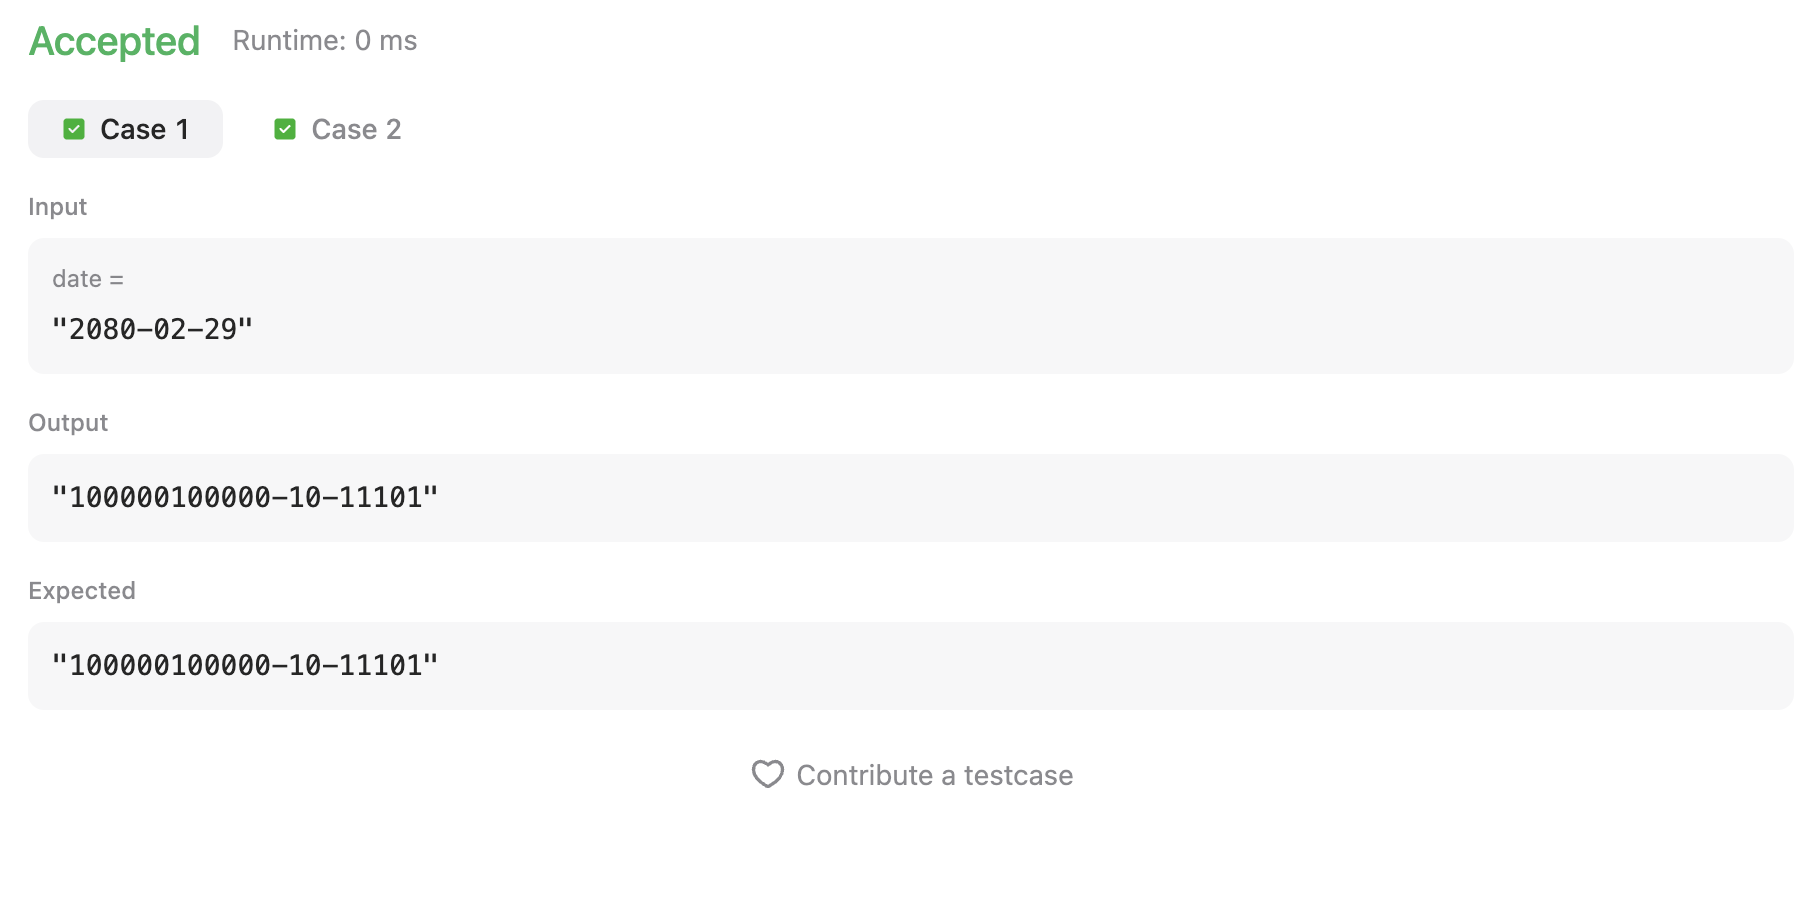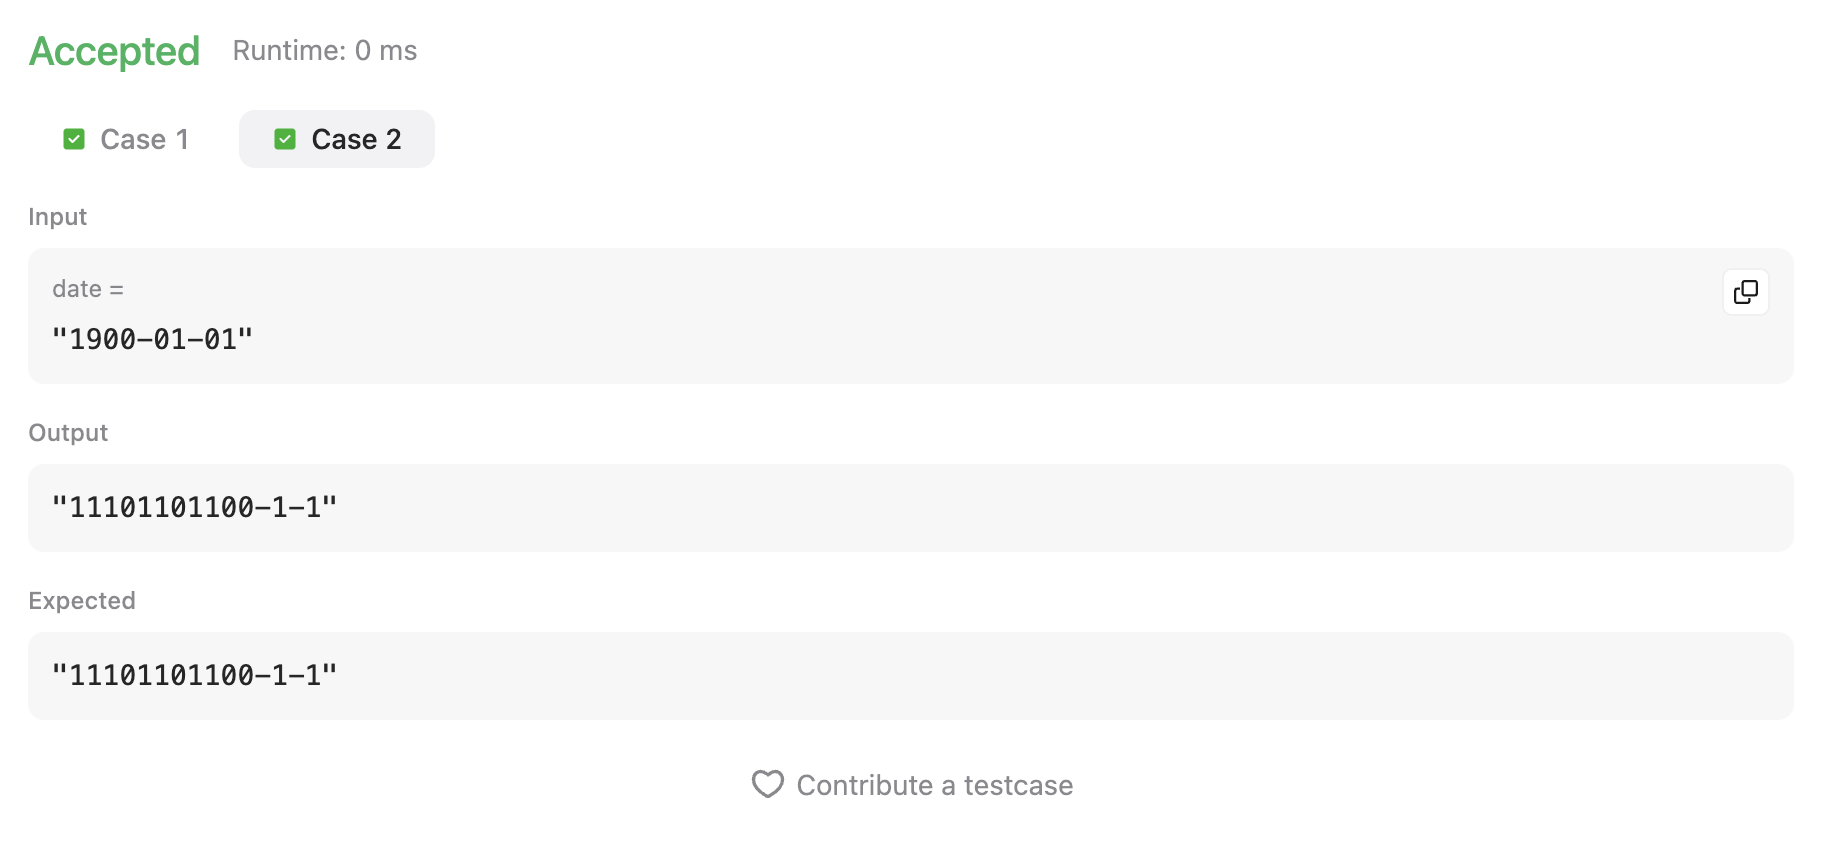

---

## 4. Review & Fixes

_What did you improve, optimize from your draft? 2 fixes with your comments._

If there is no improvements possible, please describe how the final version meets all the Code Review Checklist items

-------



In [ ]:
# Fix 1: Removed '0b' prefixes for month and day

# Draft version (month and day still had '0b' prefix from bin())
month_bin = bin(int(month))   # forgot [2:] to remove '0b'
day_bin = bin(int(day))       # forgot [2:] to remove '0b'

# Fixed version (slice [2:] for all components)
month_bin = bin(int(month))[2:]
day_bin = bin(int(day))[2:]

In [ ]:
# Fix 2: Improved code readability and formatting

# Draft version (used concatenation with +)
return year_bin + '-' + month_bin + '-' + day_bin

# Fixed version (used f-string for clarity)
return f"{year_bin}-{month_bin}-{day_bin}"

---


## 5. Reflection on Your Contribution
_Where did AI or Other's code helped or fail to help? What specific logic or debugging did you contribute yourself?_

## Example
1. I used ChatGPT (Level 4) to help identify an edge case where my draft code failed when the input string started with a closing bracket. I also used ChatGPT to help structure the final loop and mapping dictionary, but verified all logic myself by tracing the code.

2.  I used ChatGPT to help write the loop. But the code had an indentation error after the `if` block, which caused it to fail. I fixed the spacing and made sure the code runs correctly.

3. I used opensource code from Github. I found and fixed a logic bug where they used if s[i] == '(' or ')', which always returned True. I corrected it to properly check both conditions.


## Your answer:

------

1. I used ChatGPT to understand the concept of converting a date string into binary, including splitting the string into year, month, and day, and converting each component using bin(). The AI helped clarify the overall approach but did not provide the final formatting or handle the '0b' prefix issue.

2. I drafted the initial code and identified that month and day still included the '0b' prefix, which would produce incorrect output. I fixed this by slicing [2:] from the binary strings and verified the results against sample test cases.

3. I also improved the readability and maintainability of the code by using an f-string for the final concatenation instead of manual + operations. All logic, formatting, and testing decisions were made and verified by myself.

-----------

#  Problem 3 (DSA)




## 1. Understanding & Breakdown

**AI Level 1** is allowed to understand the concept, but you need to sketch the problem down by yourself (Refer to the Syllabus for more details about AI use levels). **Must Provide AI Disclosures**


### **Follow the below instruction according to the corresponding problem type**

### **For both Parts (Both DSA & Recursion problems)**

#### _Discuss the problem, using the pillars of Computation: Problem Decomposition, Pattern Recognition, Abstraction, and Algortihmic Thinking. For algorithmic thinking explain the inputs/outputs, constraints, and  draw the flowchart using digital or real pen-paper (For the flow chart only). Insert the image below._


### **For Part 1 (Basic Data Structures and Algorithms Problems)**

- For each, discuss:
    - How are you dealing with variable datatypes?
    - Which types of operations are being used and what for?
    - Which Data collections (structures) are being used, and why? (comapre to others, e.g. lists, dictionaries, sets, tuples, etc.)
    
- Compare to the other two problems: which ideas generalize? where do they differ?
    - Use abstraction and pattern recognition to find similarities
    - Use problem decomposition and algortihmic tinking to identify differnces in term so the the solution


### **For Part 2 (Recursion Problems)**

- For each, discuss:
    - What are the subproblems the recusrive function should solve?
    - What the base case and recursive step should do?
    - How the call stack will organize the recursive calls?
    - Whether to use head, tail, parameterized, and/or functional recursion, and why?
    - How are solutions to the subproblems to be combined?
    
- Compare to the other recursive problems  (similarities/differences)
- Compare to an iterative solutions (e.g., how would a loop-based version differ?)
- What needs to be changed for the recursive solution to become head/tail/parameterized/functional recursion





**Your effort is more important than the accuracy for this section**

Use the following markdown to provide your answer

**Answer:**

The problem involves reading an integer and iteratively examining its bits. One of the approaches is using n &= n-1 in an iterative fashion to remove the lowest remaining set bit from the number, and count how many iterations are needed until the value of n reaches zero. Another approach can use a lookup table and counts bits in fixed sized chunks. In both cases, the primary datatype is the integer, and the operations used in the two approaches are all bitwise AND operations, subtraction, and shifts. For pattern recognition, each iteration or lookup reduces the problem by removing or counting bits. Abstraction treats the number as a binary sequence, making it easy to generalize to numbers of any size and therefore reuse the logic to manage bits. Algorithmically, the input is a positive integer, and the output is one integer that counts the occurrences of 1s in its binary representation. The algorithm runs in O(k) time where k is the number of set bits, or O(log n) if iterating with bitwise operations is straightforward.

Just like the other DSA problems, this problem is operating on binary representation but focusing on counting and pre-computation instead of arithmetic and string formatting. Moreover, using lookup tables is optional for optimization expected to be efficient with repeated function calls.

In [ ]:
function hammingWeight(n):
count = 0
while n != 0:
n = n & (n - 1) # remove lowest set bit
count = count + 1
return count

## 2. Peer Review & Draft Code

**Review Guidance:**  

Visit the **"Solutions"** tab on LeetCode (the provided link above) for the selected problem and review at least one top-rated solution. You may also search for relevant discussions or Q&A threads on **Stack Overflow** or other forums to understand how others approached the problem.

Then, write your own version based on what you understood. The goal is not to copy but to apply what you learned. Always include links to the resources you reviewed.

---


In [ ]:
class Solution:
    def hammingWeight(self, n: int) -> int:
        count = 0
        while n > 0:
            count += n % 2
            n <<= 1
        return count

---


## 3. Final Correct Code

_This version must pass all required test cases and handle edge cases correctly. Please provide screenshots from Leetcode_

At this stage, you may:
- Review solutions using AI tools (e.g., ChatGPT, GitHub Copilot) to add ***comments*** and error handeling, refine, improve, and if there are any, fix errors.
    -   Tip: Use PROMPT and CoT methods
- Refactor your draft to ensure accuracy, completeness, follow the Code Review checklist.

### Don't forget to add comments!

 **AI Level 4 is allowed**, but you **must include a disclaimer** that clearly states what tools you used, how you used them, and for which part of the code.

--------------

In [ ]:
# Final working solution
# [AI Disclaimer: Used ChatGPT with prompt “Count number of set bits using bitwise AND and right shift” only for concept]
class Solution:
    def hammingWeight(self, n: int) -> int:
        """
        Count the number of set bits (1s) in the binary representation of an integer n.
        Uses bitwise operations for efficiency.
        """
        count = 0
        # Continue until all bits are processed
        while n:
            # Bitwise AND with 1 extracts the least significant bit
            count += n & 1
            # Right shift n by 1 to process the next bit
            n >>= 1
        return count

Add the screenshot of output for all the test cases from your working solutions.

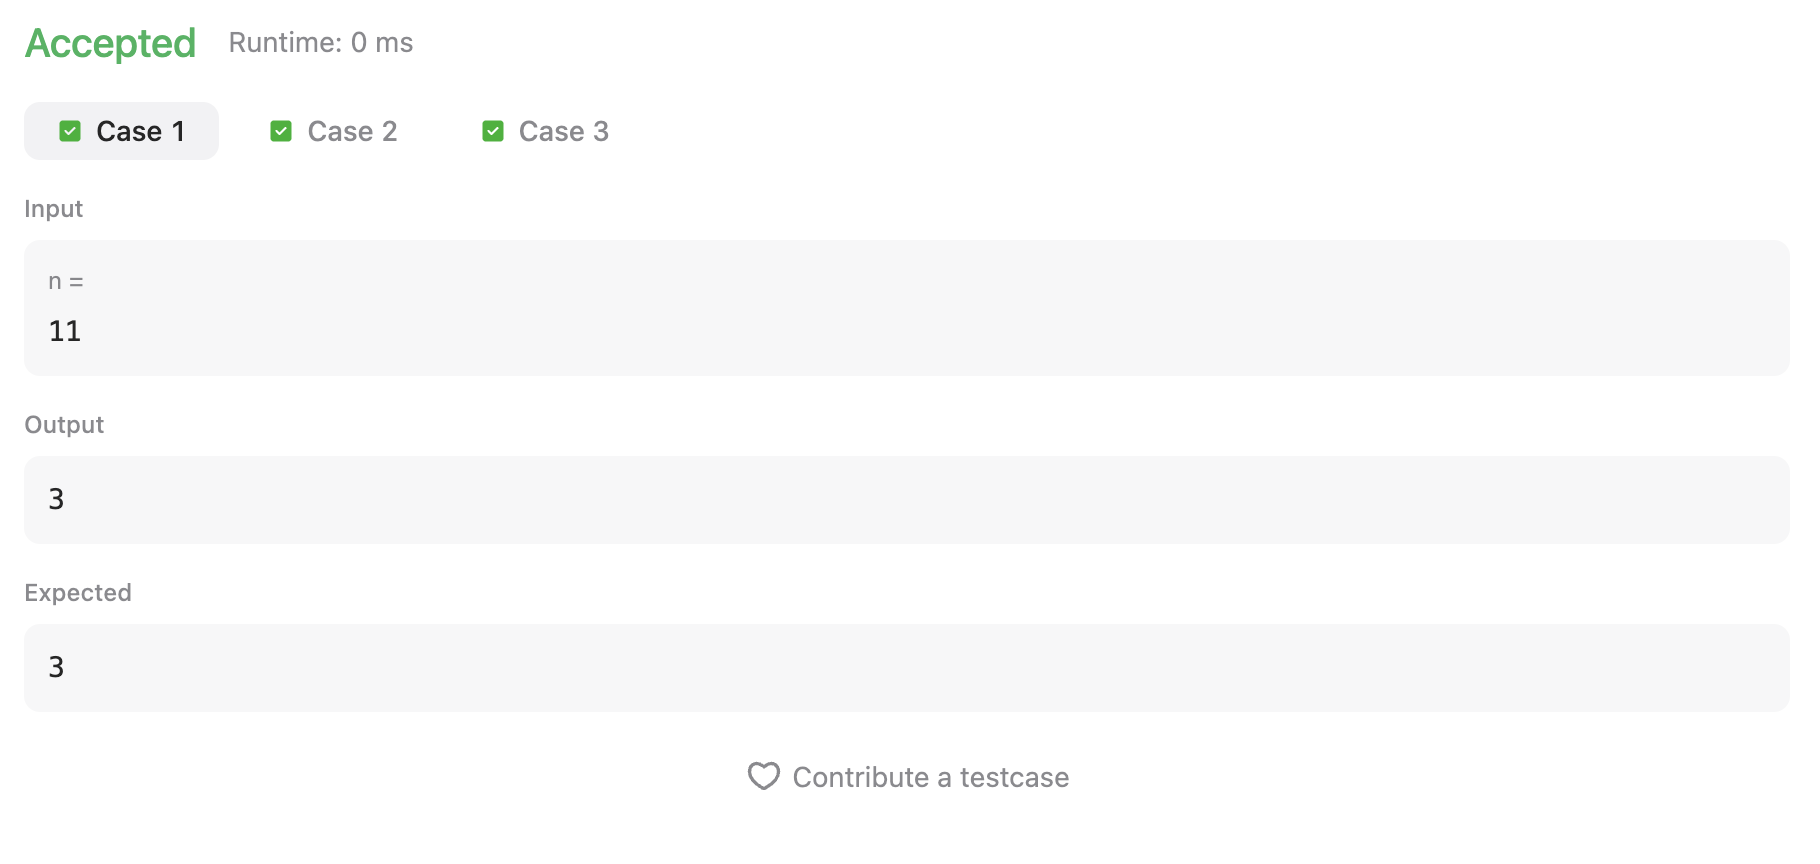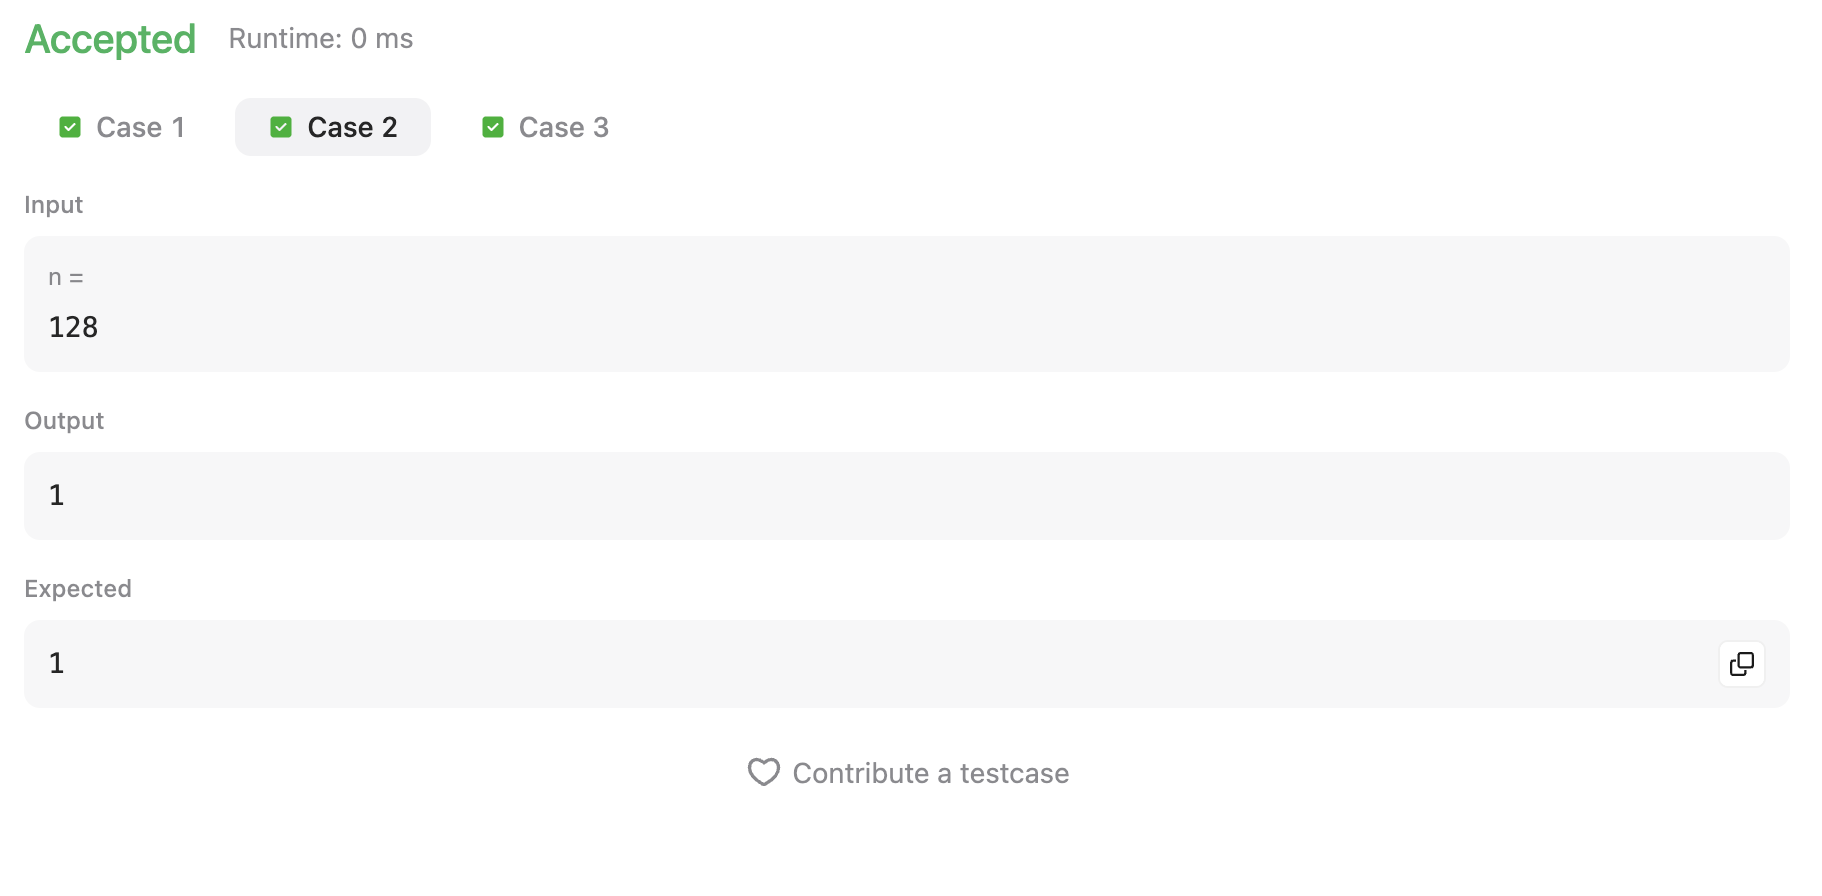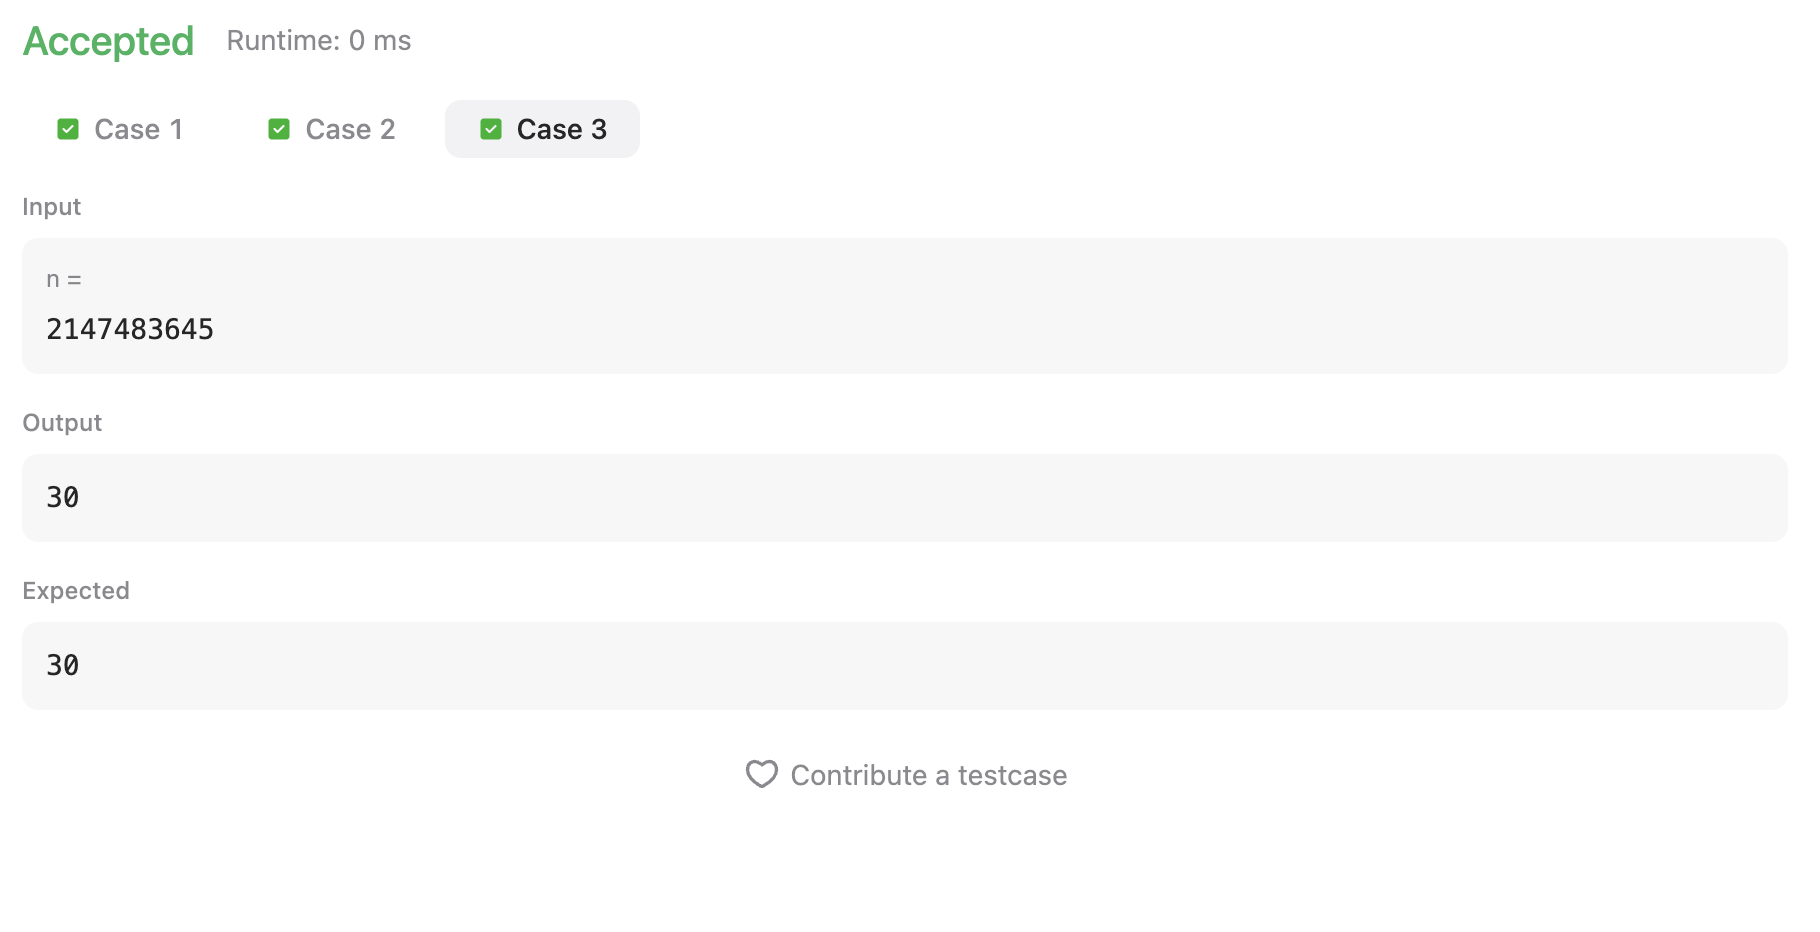

---

## 4. Review & Fixes

_What did you improve, optimize from your draft? 2 fixes with your comments._

If there is no improvements possible, please describe how the final version meets all the Code Review Checklist items

-------



In [ ]:
# Fix 1: Use bitwise AND instead of modulo

# Draft version (used n % 2 to check the least significant bit)
count += n % 2

# Fixed version (use n & 1 for proper bitwise operation)
count += n & 1

In [ ]:
# Fix 2: Correct right shift direction

# Draft version (used left shift n <<= 1)
n <<= 1

# Fixed version (use right shift n >>= 1 to move through bits)
n >>= 1

---


## 5. Reflection on Your Contribution
_Where did AI or Other's code helped or fail to help? What specific logic or debugging did you contribute yourself?_

## Example
1. I used ChatGPT (Level 4) to help identify an edge case where my draft code failed when the input string started with a closing bracket. I also used ChatGPT to help structure the final loop and mapping dictionary, but verified all logic myself by tracing the code.

2.  I used ChatGPT to help write the loop. But the code had an indentation error after the `if` block, which caused it to fail. I fixed the spacing and made sure the code runs correctly.

3. I used opensource code from Github. I found and fixed a logic bug where they used if s[i] == '(' or ')', which always returned True. I corrected it to properly check both conditions.


## Your answer:

------

1. I used ChatGPT to understand the concept of counting set bits using bitwise operations, including how n & 1 checks the least significant bit and n >>= 1 moves through the binary representation. The AI explanation helped clarify the approach but did not provide the final implementation.

2. I drafted the initial code using modulo (n % 2) and left shift, then identified and corrected these errors to properly use bitwise AND and right shift. I verified the correctness by tracing the algorithm with multiple test cases, including edge cases like 2147483645.

-----------

#  Problem 4 (Recursion)




## 1. Understanding & Breakdown

**AI Level 1** is allowed to understand the concept, but you need to sketch the problem down by yourself (Refer to the Syllabus for more details about AI use levels). **Must Provide AI Disclosures**


### **Follow the below instruction according to the corresponding problem type**

### **For both Parts (Both DSA & Recursion problems)**

#### _Discuss the problem, using the pillars of Computation: Problem Decomposition, Pattern Recognition, Abstraction, and Algortihmic Thinking. For algorithmic thinking explain the inputs/outputs, constraints, and  draw the flowchart using digital or real pen-paper (For the flow chart only). Insert the image below._


### **For Part 1 (Basic Data Structures and Algorithms Problems)**

- For each, discuss:
    - How are you dealing with variable datatypes?
    - Which types of operations are being used and what for?
    - Which Data collections (structures) are being used, and why? (comapre to others, e.g. lists, dictionaries, sets, tuples, etc.)
    
- Compare to the other two problems: which ideas generalize? where do they differ?
    - Use abstraction and pattern recognition to find similarities
    - Use problem decomposition and algortihmic tinking to identify differnces in term so the the solution


### **For Part 2 (Recursion Problems)**

- For each, discuss:
    - What are the subproblems the recusrive function should solve?
    - What the base case and recursive step should do?
    - How the call stack will organize the recursive calls?
    - Whether to use head, tail, parameterized, and/or functional recursion, and why?
    - How are solutions to the subproblems to be combined?
    
- Compare to the other recursive problems  (similarities/differences)
- Compare to an iterative solutions (e.g., how would a loop-based version differ?)
- What needs to be changed for the recursive solution to become head/tail/parameterized/functional recursion





**Your effort is more important than the accuracy for this section**

Use the following markdown to provide your answer

**Answer:**

The problem can be broken down into extracting digits, reversing the order of the digits, handling negative signs and checking for overflow. The main data type is integer with the numeric operations of modulo, division, multiplication and comparison. There is no need for more additional collections, since the digits are being processed one at a time to reverse. Pattern recognition shows that reversing digits can follow a consistent process of taking the last digit and concatenating on the digit to partial results. Abstraction treats the number as a sequence of digits rather than considering its numeric representation. Algorithmic thinking defines the input (x), output (reversed integer or 0), and a loop or recursion to process digits.

Compared to other recursive problems, this problem generates a result step by step but with different operations and data structures. The algorithm itself is a more general idea of processing elements iteratively or recursively and combining the partial results.


In [ ]:
while x != 0:
    digit = x % 10
    x = x // 10
    rev = rev * 10 + digit

## 2. Peer Review & Draft Code

**Review Guidance:**  

Visit the **"Solutions"** tab on LeetCode (the provided link above) for the selected problem and review at least one top-rated solution. You may also search for relevant discussions or Q&A threads on **Stack Overflow** or other forums to understand how others approached the problem.

Then, write your own version based on what you understood. The goal is not to copy but to apply what you learned. Always include links to the resources you reviewed.

---


In [ ]:
class Solution:
    def reverse(self, x: int) -> int:
        rev = 0
        sign = 1
        if x < 0:
            sign = -1
            x = -x

        while x > 0:
            digit = x % 10
            rev = rev + digit * 10
            x = x // 10

        rev = rev * sign

        if rev > 2**31 or rev < 2**31 - 1:
            return 0

        return rev

---


## 3. Final Correct Code

_This version must pass all required test cases and handle edge cases correctly. Please provide screenshots from Leetcode_

At this stage, you may:
- Review solutions using AI tools (e.g., ChatGPT, GitHub Copilot) to add ***comments*** and error handling, refine, improve, and if there are any, fix errors.
    -   Tip: Use PROMPT and CoT methods
- Refactor your draft to ensure accuracy, completeness, follow the Code Review checklist.

### Don't forget to add comments!

 **AI Level 4 is allowed**, but you **must include a disclaimer** that clearly states what tools you used, how you used them, and for which part of the code.

--------------

In [ ]:
# Final working solution
# [AI Disclaimer: Used ChatGPT with prompt “How to handle 32-bit integer overflow when reversing digits” only for concept]
class Solution:
    def reverse(self, x: int) -> int:
        """
        Reverses a signed 32-bit integer.
        Returns 0 if the reversed integer overflows the 32-bit signed integer range.
        """
        rev = 0
        sign = -1 if x < 0 else 1  # Determine the sign
        x = abs(x)  # Work with positive value for reversal

        while x != 0:
            digit = x % 10  # Extract last digit
            rev = rev * 10 + digit  # Append digit to reversed number
            x //= 10  # Remove last digit from x

        rev *= sign  # Reapply the original sign

        # Check for 32-bit signed integer overflow
        if rev < -2**31 or rev > 2**31 - 1:
            return 0

        return rev


Add the screenshot of output for all the test cases from your working solutions.
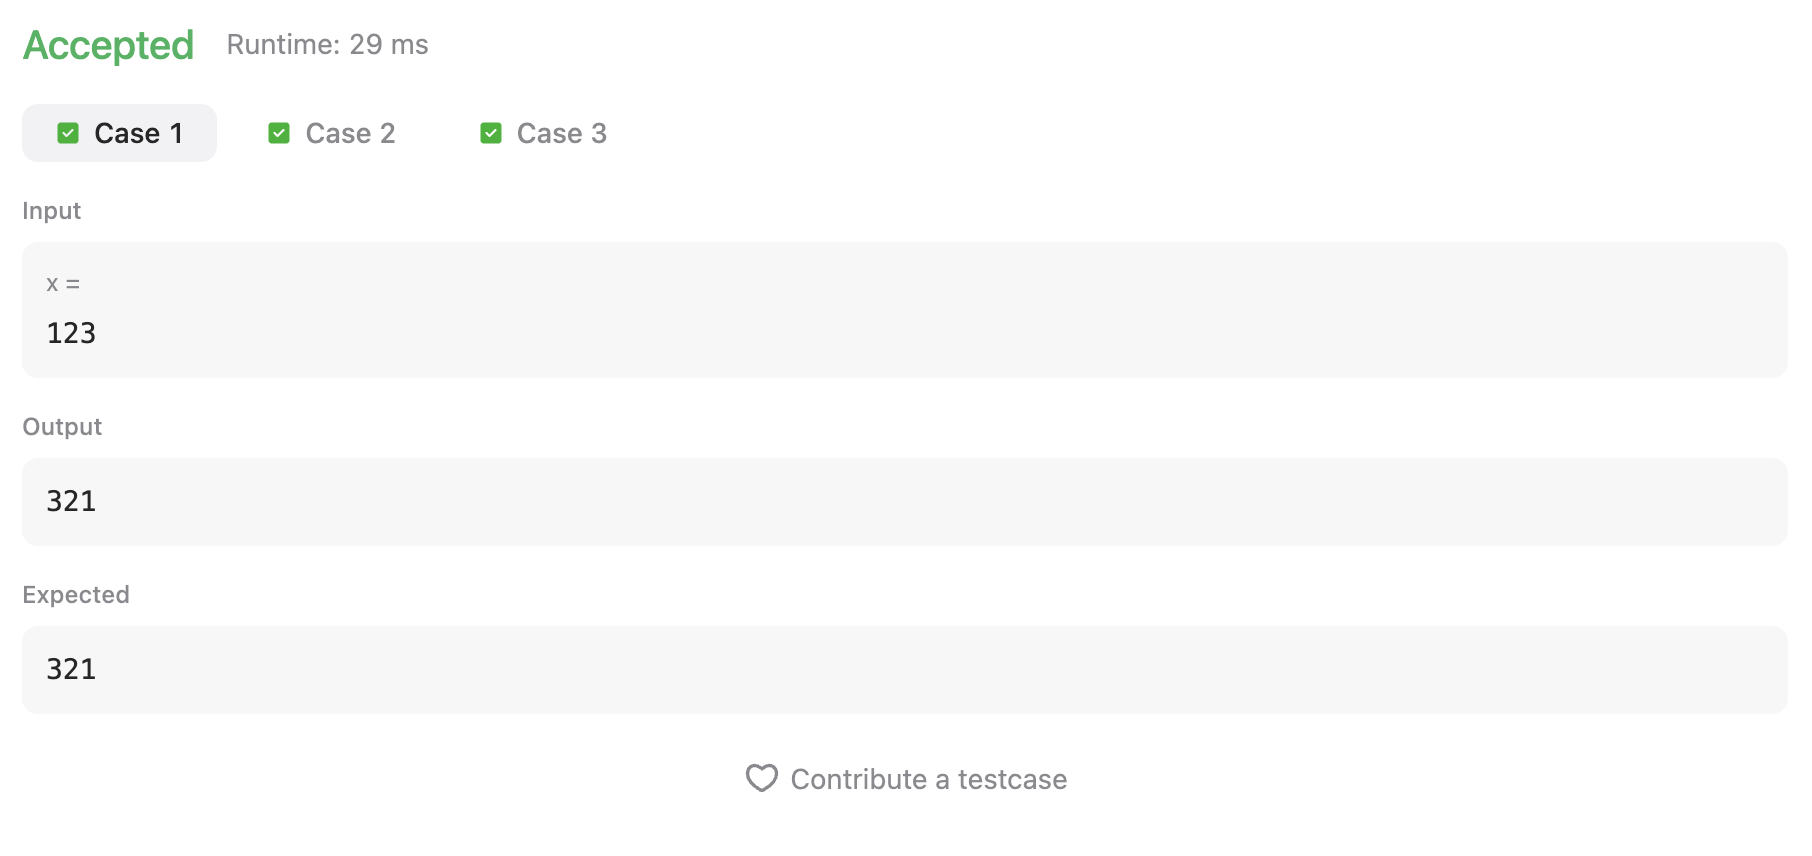
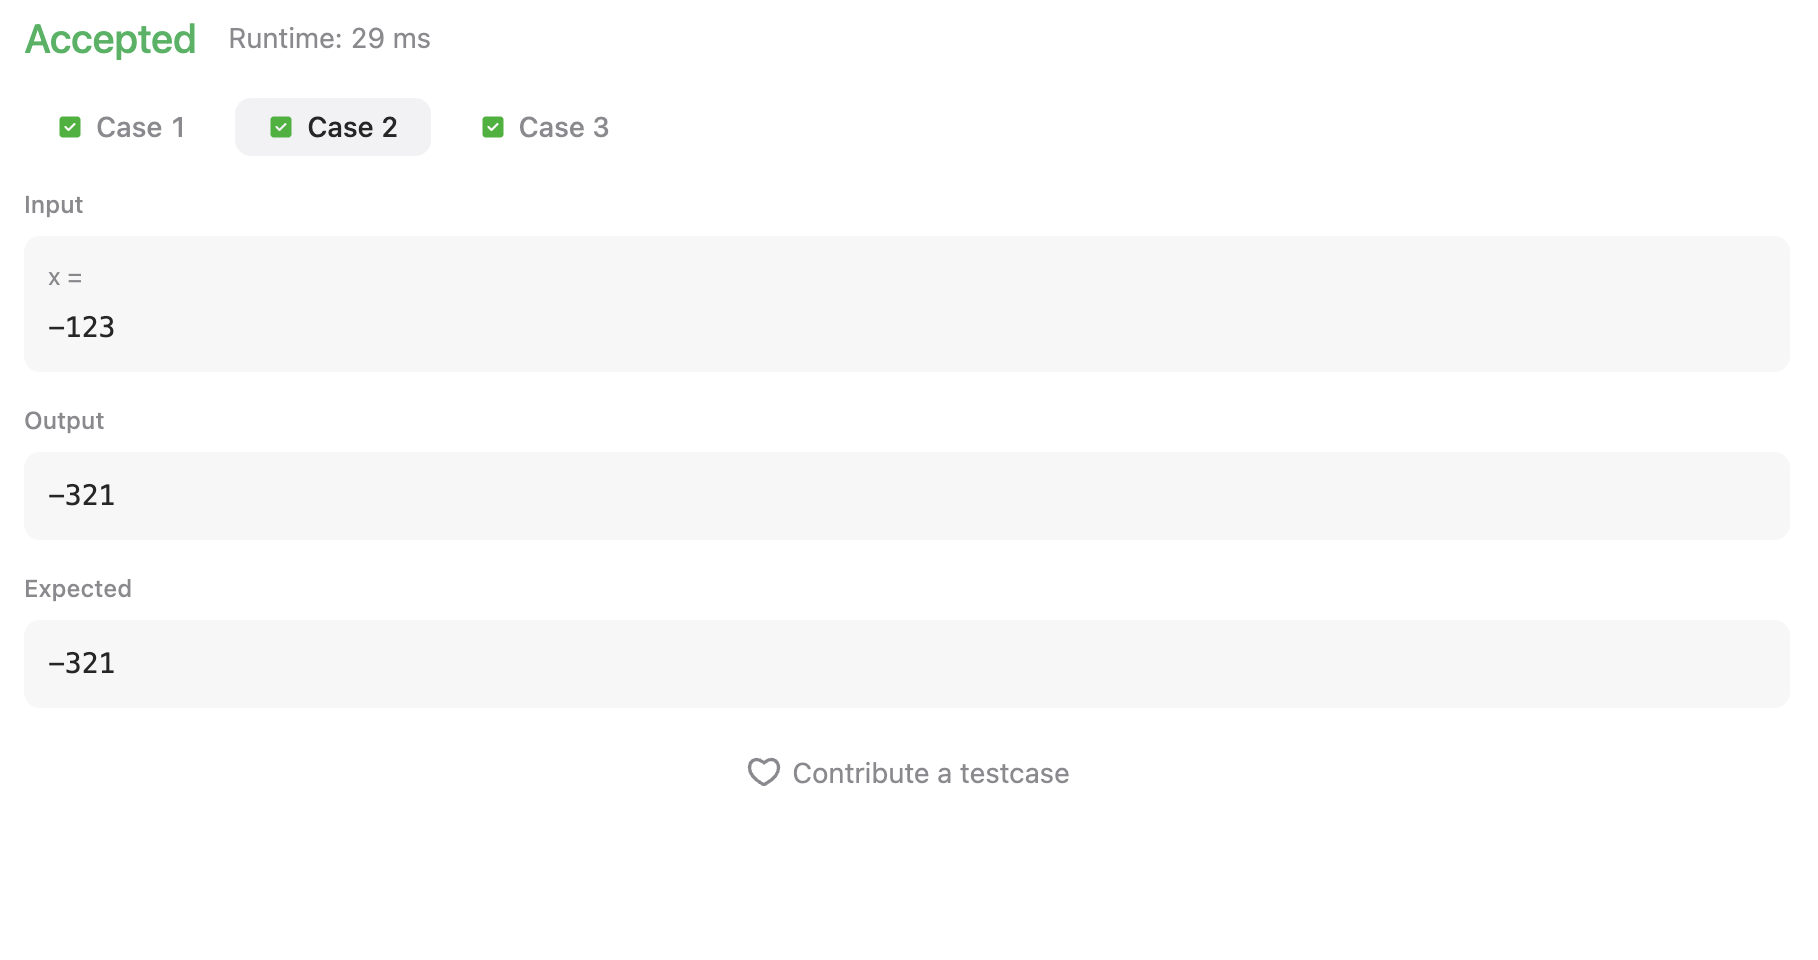
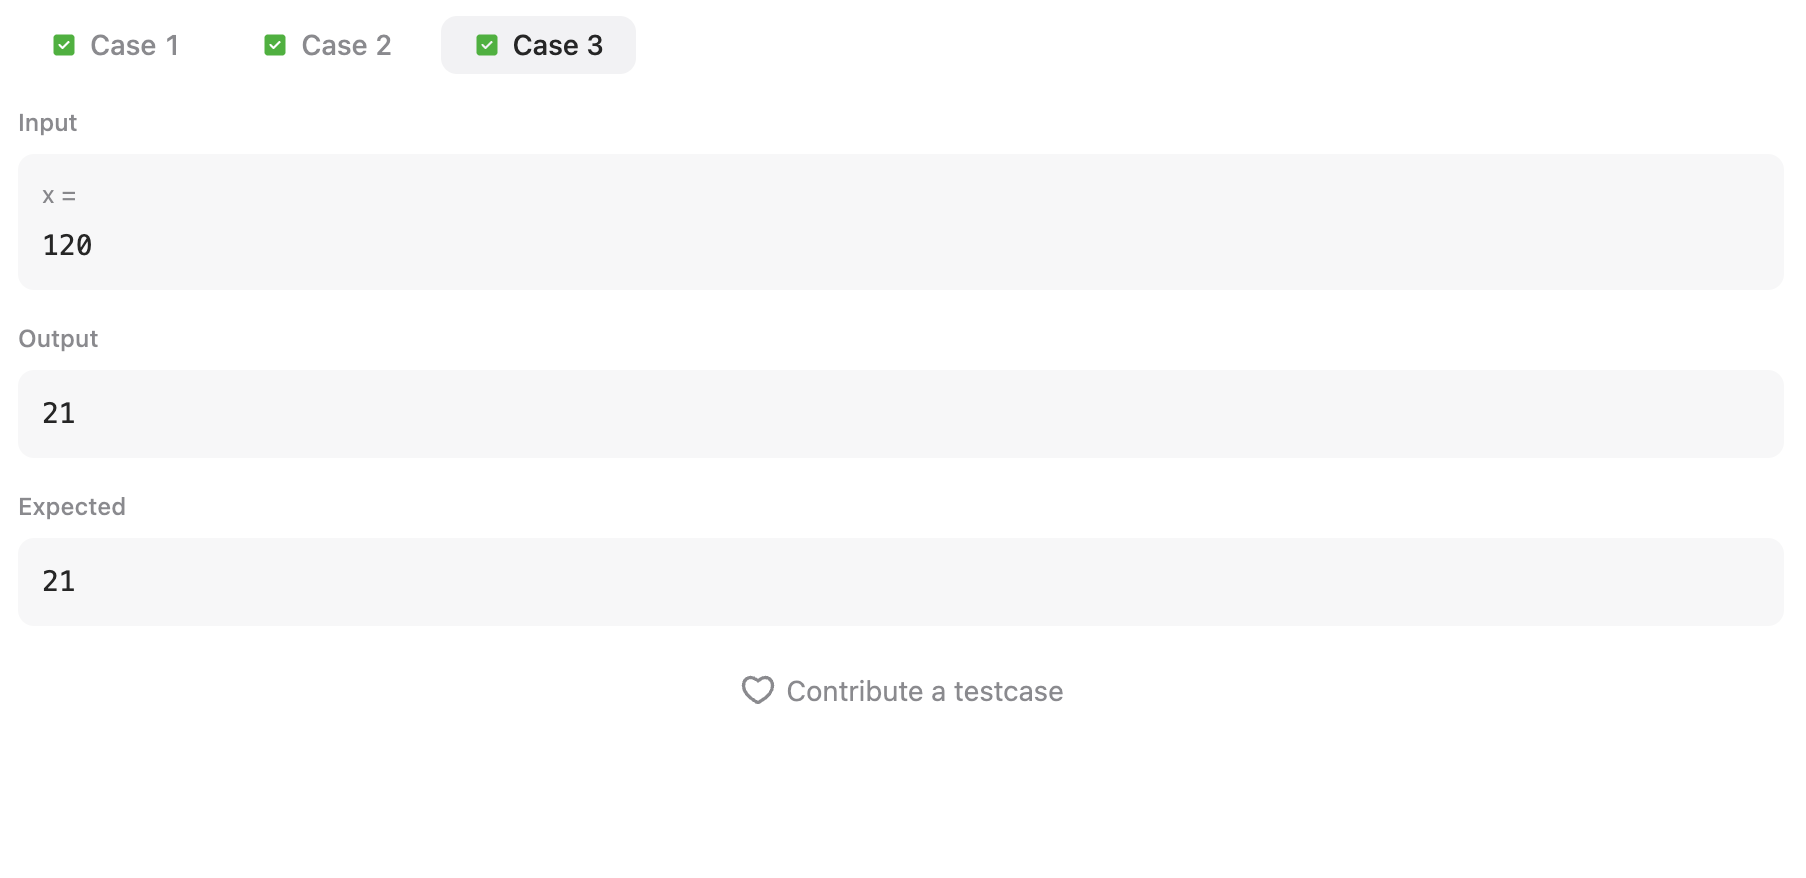

---

## 4. Review & Fixes

_What did you improve, optimize from your draft? 2 fixes with your comments._

If there is no improvements possible, please describe how the final version meets all the Code Review Checklist items

-------



In [ ]:
# Fix 1: Corrected the digit combination logic

# Draft version (incorrect digit combination)
rev = rev + digit * 10

# Fixed version (corrected multiplication order)
rev = rev * 10 + digit

In [ ]:
# Fix 2: Corrected the overflow check

# Draft version (incorrect overflow check)
if rev > 2**31 or rev < 2**31 - 1:
    return 0

# Fixed version (correct bounds for 32-bit signed integer)
if rev < -2**31 or rev > 2**31 - 1:
    return 0

---


## 5. Reflection on Your Contribution
_Where did AI or Other's code helped or fail to help? What specific logic or debugging did you contribute yourself?_

## Example
1. I used ChatGPT (Level 4) to help identify an edge case where my draft code failed when the input string started with a closing bracket. I also used ChatGPT to help structure the final loop and mapping dictionary, but verified all logic myself by tracing the code.

2.  I used ChatGPT to help write the loop. But the code had an indentation error after the `if` block, which caused it to fail. I fixed the spacing and made sure the code runs correctly.

3. I used opensource code from Github. I found and fixed a logic bug where they used if s[i] == '(' or ')', which always returned True. I corrected it to properly check both conditions.


## Your answer:

------

1. I used ChatGPT (Level 4) to review approaches for reversing a 32-bit integer and understand how to handle overflow. It helped clarify the concept of extracting digits, building the reversed number, and checking bounds.

2. The AI did not catch the errors in my draft, such as the incorrect digit combination and the wrong overflow check. I identified and corrected these myself.

3. I verified the multiplication order for appending digits and ensured the 32-bit signed integer bounds were applied correctly.


-----------

#  Problem 5 (Recursion)




## 1. Understanding & Breakdown

**AI Level 1** is allowed to understand the concept, but you need to sketch the problem down by yourself (Refer to the Syllabus for more details about AI use levels). **Must Provide AI Disclosures**


### **Follow the below instruction according to the corresponding problem type**

### **For both Parts (Both DSA & Recursion problems)**

#### _Discuss the problem, using the pillars of Computation: Problem Decomposition, Pattern Recognition, Abstraction, and Algortihmic Thinking. For algorithmic thinking explain the inputs/outputs, constraints, and  draw the flowchart using digital or real pen-paper (For the flow chart only). Insert the image below._


### **For Part 1 (Basic Data Structures and Algorithms Problems)**

- For each, discuss:
    - How are you dealing with variable datatypes?
    - Which types of operations are being used and what for?
    - Which Data collections (structures) are being used, and why? (comapre to others, e.g. lists, dictionaries, sets, tuples, etc.)
    
- Compare to the other two problems: which ideas generalize? where do they differ?
    - Use abstraction and pattern recognition to find similarities
    - Use problem decomposition and algortihmic tinking to identify differnces in term so the the solution


### **For Part 2 (Recursion Problems)**

- For each, discuss:
    - What are the subproblems the recusrive function should solve?
    - What the base case and recursive step should do?
    - How the call stack will organize the recursive calls?
    - Whether to use head, tail, parameterized, and/or functional recursion, and why?
    - How are solutions to the subproblems to be combined?
    
- Compare to the other recursive problems  (similarities/differences)
- Compare to an iterative solutions (e.g., how would a loop-based version differ?)
- What needs to be changed for the recursive solution to become head/tail/parameterized/functional recursion





**Your effort is more important than the accuracy for this section**

Use the following markdown to provide your answer

**Answer:**

The problem can be broken down into swapping characters moving in from 1 end of the array and the other. The main data type is a list of characters and the operations required will be basic indexing and swapping. No extra collections are needed since the reversal must be done with O(1) extra space. Pattern recognition shows that each pair of characters at symmetric positions will be swapped only once, and this is repeated until each character is reversed. Algorithmic thinking defines the input, output, and a two-pointer loop.

Compared to other recursion problems, this problem also develops a result stepwise, but a step in this problem would be the in-place swapping of elements in an array, rather than a mixture of counting conditions or numerical calculations.

In [ ]:
left, right = 0, len(s)-1
while left < right:
    s[left], s[right] = s[right], s[left]
    left += 1
    right -= 1

## 2. Peer Review & Draft Code

**Review Guidance:**  

Visit the **"Solutions"** tab on LeetCode (the provided link above) for the selected problem and review at least one top-rated solution. You may also search for relevant discussions or Q&A threads on **Stack Overflow** or other forums to understand how others approached the problem.

Then, write your own version based on what you understood. The goal is not to copy but to apply what you learned. Always include links to the resources you reviewed.

---


In [ ]:
class Solution:
    def reverseString(self, s: list) -> None:
        left, right = 0, len(s)

        while left <= right:
            temp = s[left]
            s[left] = s[right]
            s[right] = temp
            left += 1
            right -= 1

---


## 3. Final Correct Code

_This version must pass all required test cases and handle edge cases correctly. Please provide screenshots from Leetcode_

At this stage, you may:
- Review solutions using AI tools (e.g., ChatGPT, GitHub Copilot) to add ***comments*** and error handeling, refine, improve, and if there are any, fix errors.
    -   Tip: Use PROMPT and CoT methods
- Refactor your draft to ensure accuracy, completeness, follow the Code Review checklist.

### Don't forget to add comments!

 **AI Level 4 is allowed**, but you **must include a disclaimer** that clearly states what tools you used, how you used them, and for which part of the code.

--------------

In [ ]:
# Final working solution
# [AI Disclaimer: Used ChatGPT with prompt “How to reverse a list of characters in-place using two pointers” only for concept]
class Solution:
    def reverseString(self, s: list) -> None:
        """
        Reverses the input list of characters in-place.
        Does not return anything as the list is modified directly.
        """
        left, right = 0, len(s) - 1  # Initialize pointers at start and end

        while left < right:  # Loop until pointers meet
            # Swap characters at left and right indices
            s[left], s[right] = s[right], s[left]
            left += 1  # Move left pointer forward
            right -= 1  # Move right pointer backward

Add the screenshot of output for all the test cases from your working solutions.

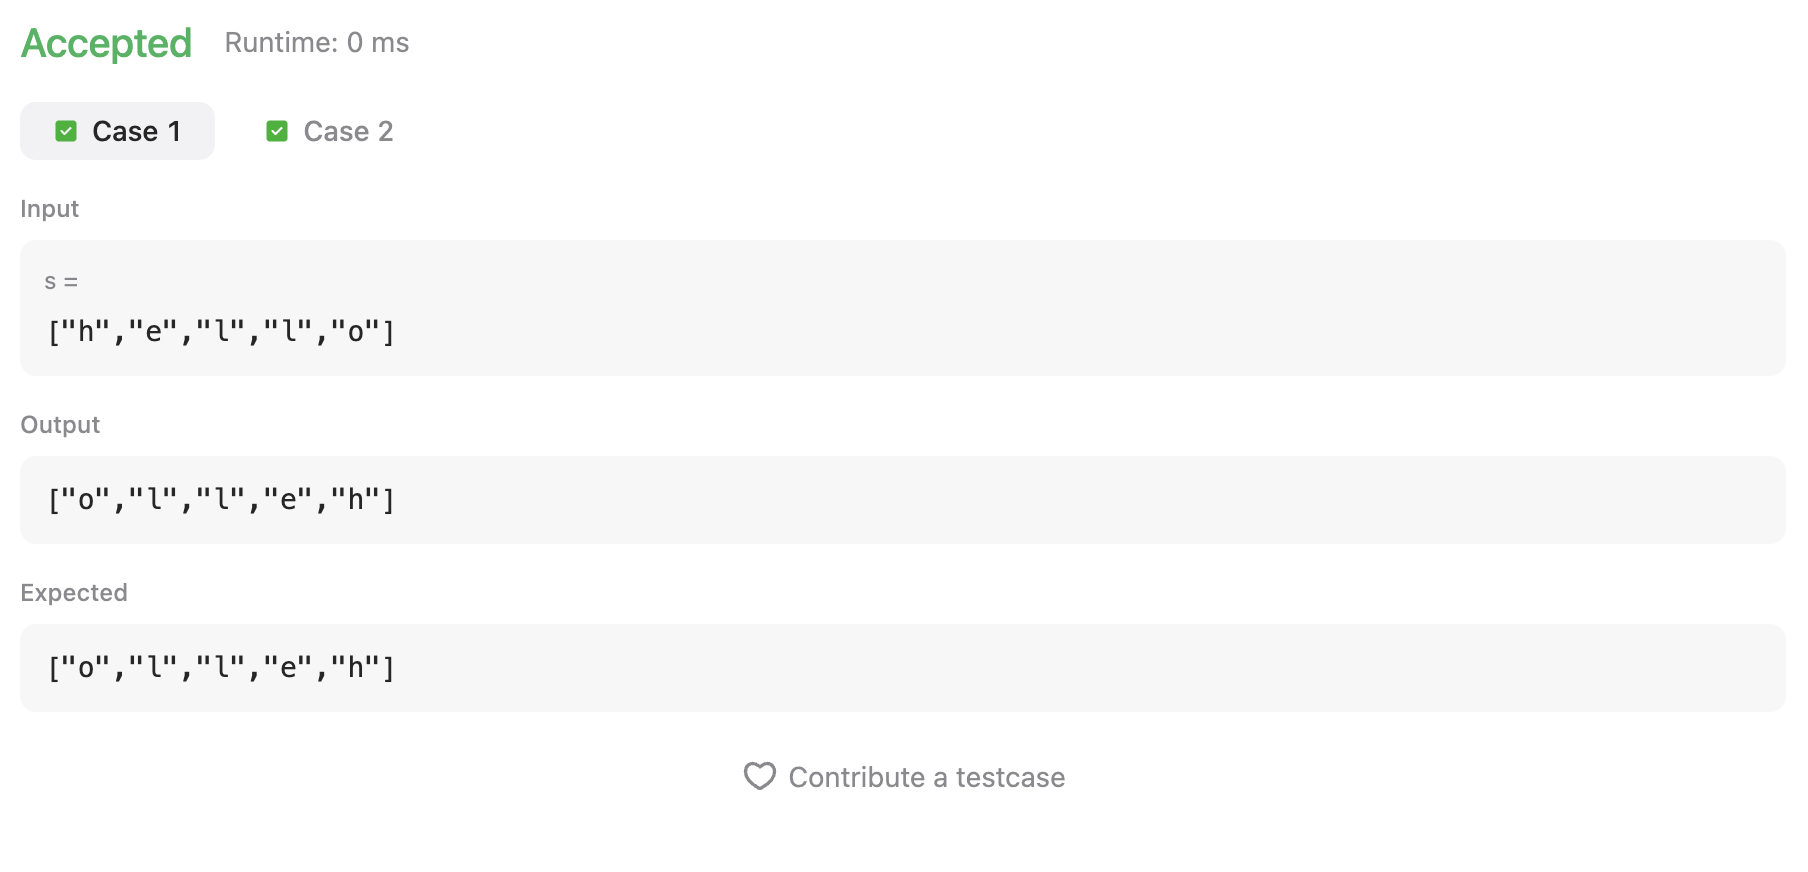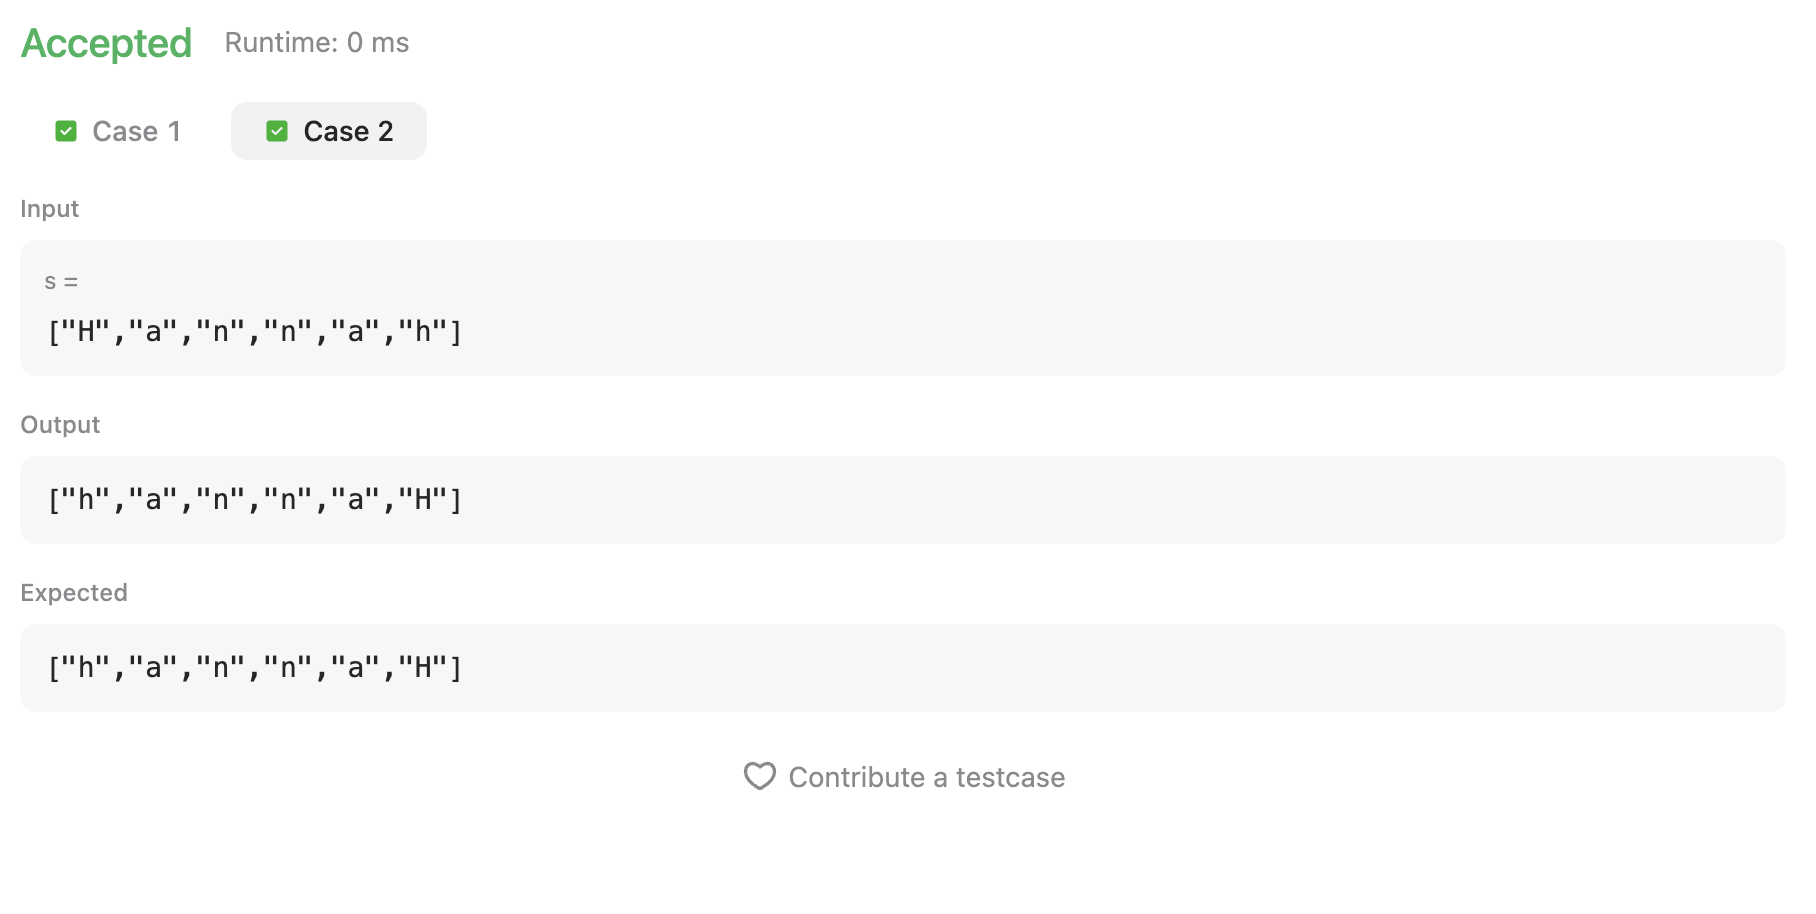

---

## 4. Review & Fixes

_What did you improve, optimize from your draft? 2 fixes with your comments._

If there is no improvements possible, please describe how the final version meets all the Code Review Checklist items

-------



In [ ]:
# Fix 1: Corrected right pointer initialization

# Draft version (will cause IndexError)
right = len(s)

# Fixed version (points to last valid index)
right = len(s) - 1

In [ ]:
# Fix 2: Corrected loop condition

# Draft version (May cause unnecessary swap when left == right)
while left <= right:

# Fixed version (Stops when pointers meet, avoids redundant swap)
while left < right:

---


## 5. Reflection on Your Contribution
_Where did AI or Other's code helped or fail to help? What specific logic or debugging did you contribute yourself?_

## Example
1. I used ChatGPT (Level 4) to help identify an edge case where my draft code failed when the input string started with a closing bracket. I also used ChatGPT to help structure the final loop and mapping dictionary, but verified all logic myself by tracing the code.

2.  I used ChatGPT to help write the loop. But the code had an indentation error after the `if` block, which caused it to fail. I fixed the spacing and made sure the code runs correctly.

3. I used opensource code from Github. I found and fixed a logic bug where they used if s[i] == '(' or ')', which always returned True. I corrected it to properly check both conditions.


## Your answer:

------

1. I used ChatGPT (Level 4) to explore the two-pointer approach and understand why it efficiently reverses a list in-place. This helped me grasp how swapping characters symmetrically from both ends avoids extra memory usage.

2. I applied this understanding to manually implement the swaps and loop logic, ensuring the input array is reversed correctly while maintaining O(1) space complexity.


-----------

# **The most important part of writing code is not the code itself, but the thinking that leads to it. Thank You 😀**